# Data Analytics Major Project – Task 4: Sentiment Analysis
# Objective

To analyze the sentiment of textual data (e.g., reviews, tweets, or quotes) and classify them into categories such as Positive, Negative, and Neutral, using NLP techniques and visualization.

# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download required nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Load Dataset

In [3]:
# Load dataset
df = pd.read_csv("quotes_dataset.csv")

# Check structure
print(df.head())
print(df.columns)


                                               Quote           Author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                           Tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, live, miracle, miracles  
3              aliteracy, books, classic, humor  
4                    be-yourself, inspirational  
Index(['Quote', 'Author', 'Tags'], dtype='object')


# Step 3: Data Preprocessing

In [6]:
import nltk

# Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# In newer versions, also download punkt_tab
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Choose text column (update column name if needed)
df['clean_text'] = df['Quote'].astype(str).str.lower()

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(
    [word for word in word_tokenize(x) if word.isalpha() and word not in stop_words]
))

print(df[['Quote','clean_text']].head())


                                               Quote  \
0  “The world as we have created it is a process ...   
1  “It is our choices, Harry, that show what we t...   
2  “There are only two ways to live your life. On...   
3  “The person, be it gentleman or lady, who has ...   
4  “Imperfection is beauty, madness is genius and...   

                                          clean_text  
0  world created process thinking changed without...  
1             choices harry show truly far abilities  
2  two ways live life one though nothing miracle ...  
3  person gentleman lady pleasure good novel must...  
4  imperfection beauty madness genius better abso...  


# Step 4: Sentiment Analysis using VADER

In [8]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply to dataset
df['sentiment_score'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize into Positive / Negative / Neutral
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 
                                              else ('Negative' if x < -0.05 else 'Neutral'))

print(df[['Quote', 'sentiment_score', 'sentiment']].head())


                                               Quote  sentiment_score  \
0  “The world as we have created it is a process ...           0.2500   
1  “It is our choices, Harry, that show what we t...           0.5994   
2  “There are only two ways to live your life. On...          -0.7306   
3  “The person, be it gentleman or lady, who has ...           0.6705   
4  “Imperfection is beauty, madness is genius and...          -0.2143   

  sentiment  
0  Positive  
1  Positive  
2  Negative  
3  Positive  
4  Negative  


# Step 5: Sentiment Distribution Visualization

C:\Users\sahil\AppData\Local\Temp\ipykernel_20208\3399846915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


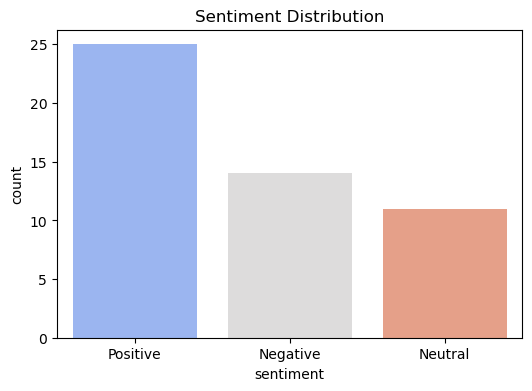

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()


# Step 6: WordClouds for Each Sentiment

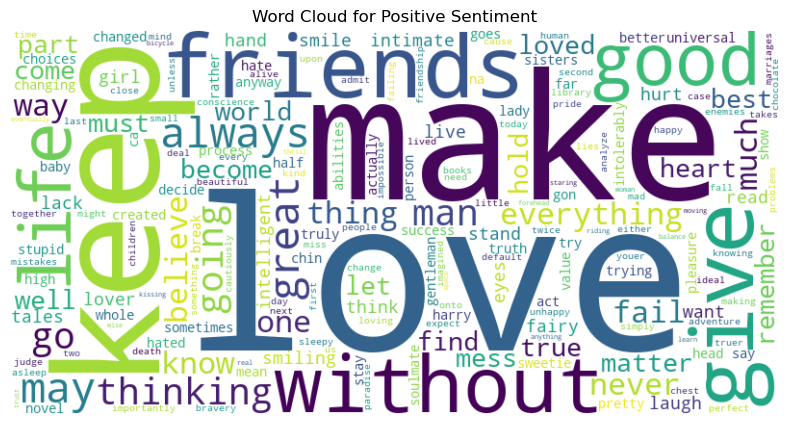

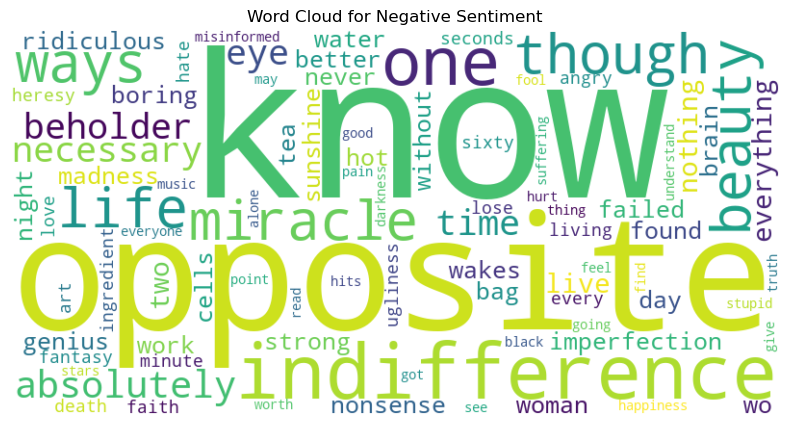

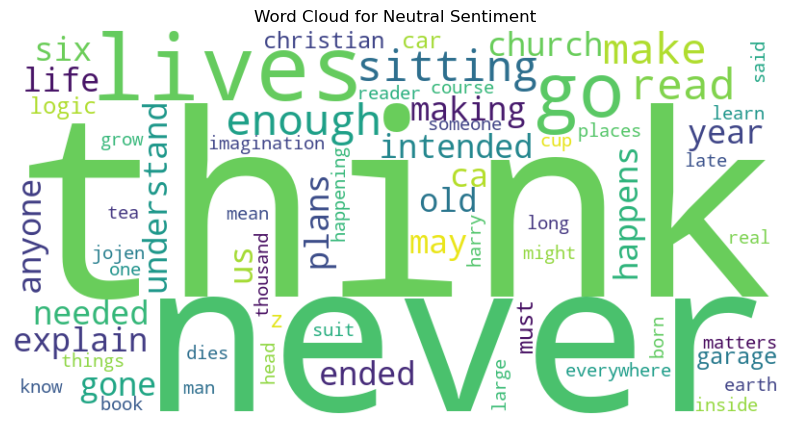

In [10]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()


# Step 7: Save Processed Data

In [11]:
df.to_csv("sentiment_analysis_output.csv", index=False)
print(" Sentiment analysis completed and saved.")


 Sentiment analysis completed and saved.
